<a href="https://colab.research.google.com/github/MinhDat13/Bai_tap_AI/blob/main/AI_W12_Pre_Trained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.3 MB/s eta 0:00:00


4/4 [==============================] - 1s 79ms/step
{'box': [565, 132, 41, 58], 'confidence': 0.9999988675117493, 'keypoints': {'left_eye': (574, 153), 'right_eye': (593, 155), 'nose': (582, 162), 'mouth_left': (572, 173), 'mouth_right': (591, 175)}}
{'box': [219, 83, 34, 47], 'confidence': 0.9999982714653015, 'keypoints': {'left_eye': (230, 99), 'right_eye': (246, 102), 'nose': (238, 108), 'mouth_left': (228, 115), 'mouth_right': (242, 119)}}
{'box': [491, 114, 38, 49], 'confidence': 0.999997079372406, 'keypoints': {'left_eye': (499, 131), 'right_eye': (517, 133), 'nose': (506, 136), 'mouth_left': (497, 148), 'mouth_right': (514, 150)}}
{'box': [145, 231, 39, 47], 'confidence': 0.999992311000824, 'keypoints': {'left_eye': (155, 248), 'right_eye': (173, 248), 'nose': (163, 260), 'mouth_left': (155, 265), 'mouth_right': (173, 264)}}
{'box': [326, 181, 42, 59], 'confidence': 0.9999905228614807, 'keypoints': {'left_eye': (338, 204), 'right_eye': (357, 207), 'nose': (345, 215), 'mouth_left

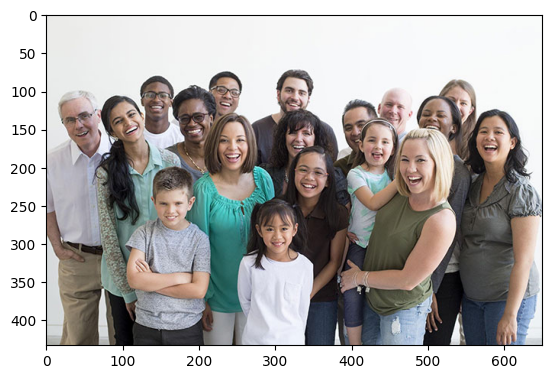

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename = '/content/chup-anh-nhom-tuyet-dep.jpg'
img = plt.imread(filename)
plt.imshow(img)
detector = MTCNN()
faces = detector.detect_faces(img)
for face in faces:
  print(face)

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename = '/content/chup-anh-nhom-tuyet-dep.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
plt.imshow(img)
ax = plt.gca()
for face in faces:
  x,y,width, height = face ['box']
  rect = plt.Rectangle((x,y),width,height,fill = False, color = 'blue')
  ax.add_patch(rect)
  for key,value, in face['keypoints'].items():
    dot = plt.Circle(value, radius = 2, color = 'blue')
    ax.add_patch(dot)
    plt.savefig('plt5.png')
plt.show()

ValueError: ignored

4/4 [==============================] - 1s 75ms/step


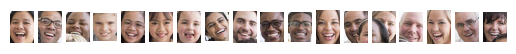

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def draw_face(filename,result_list):
  data = plt.imread(filename)
  for i in range(len(result_list)):
    x1,y1,width,height = result_list[i]['box']
    x2, y2,  =  x1+width,y1+height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
  for i in len(result):
  plt.savefig
  plt.show()

filename = '/content/chup-anh-nhom-tuyet-dep.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
draw_face(filename,faces)





    

1/1 [==============================] - 2s 2s/step
Predicted: [('n11939491', 'daisy', 0.53147256), ('n07753592', 'banana', 0.08585553), ('n09256479', 'coral_reef', 0.0439039)]


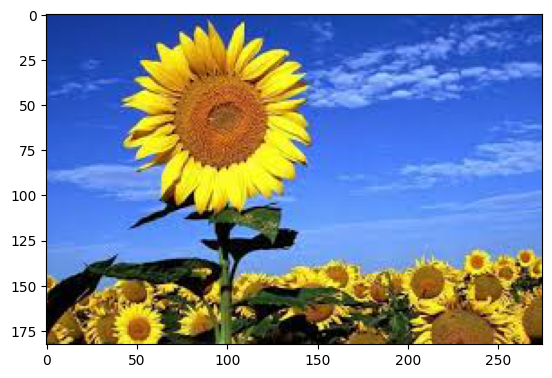

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'sunflower.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
img = plt.imread(img_path)
plt.imshow(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

In [ ]:
#vgg16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = 'house.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print('Predicted:', decode_predictions(features, top=5)[0])

1/1 [==============================] - 1s 1s/step


ValueError: ignored

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit(...)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(...)